In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

In [3]:
import shap
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Thesis v3/2 Model/vgg16.keras')

In [5]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_52 (Conv1D)              │ (None, 51, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 51, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 51, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_53 (Conv1D)              │ (None, 51, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 51, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 51, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_54 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_55 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_56 (Conv1D)              │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_57 (Conv1D)              │ (None, 12, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_58 (Conv1D)              │ (None, 12, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 12, 256)        │         1,02

 Total params: 71,493,576 (272.73 MB)

 Trainable params: 23,822,914 (90.88 MB)

 Non-trainable params: 24,832 (97.00 KB)

 Optimizer params: 47,645,830 (181.75 MB)

In [6]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/Thesis v3/1 Extracted Features/df_train.csv")
#df_train

In [7]:
df_test = pd.read_csv("/content/drive/MyDrive/Thesis v3/1 Extracted Features/df_test.csv")
#df_test

In [8]:
import tensorflow as tf

In [9]:
X = df_train.drop('audio_type', axis=1).values
y = df_train['audio_type'].values

# Encode categorical labels to numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

# One-hot encode numerical labels
y_one_hot = tf.keras.utils.to_categorical(y_numerical, num_classes=2)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaN values in features
if np.isnan(X_scaled).any():
    print("Warning: NaN values found in scaled features (X_scaled). This can cause 'nan' loss during training.")
    # Option 1: Impute NaNs (e.g., with mean, median, or zero)
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(strategy='mean')
    # X = imputer.fit_transform(X)
    # print("NaNs have been imputed with the mean.")

    # For now, we will proceed to see if other issues arise, but imputation is recommended.
else:
    print("No NaN values found in scaled features (X_scaled).")

No NaN values found in scaled features (X_scaled).


In [10]:
from sklearn.model_selection import KFold, train_test_split

In [11]:
# 1. Data Splitting (Source: 131)
# "Training data... 70%, test data... 30%"
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.1, random_state=42)

# Reshape input to (Samples, 51, 1) for 1D CNN (corrected from 50 to 51)
X_train_full = X_train_full.reshape(X_train_full.shape[0], 51, 1)
X_test = X_test.reshape(X_test.shape[0], 51, 1)

# 2. 10-Fold Cross-Validation (Source: 272)
# "10-fold cross-validation was implemented within the training data"
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_no = 1
scores = []

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [13]:
# 3. Final Evaluation on Test Data
# Train final model on full training set and evaluate on the 30% held-out test set
print("\nTraining Final Model on full Training Set...")
final_model = model
final_model.fit(X_train_full, y_train_full, batch_size=32, epochs=30, verbose=0)

loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)

# Calculate Sensitivity and Specificity (Source: 523-527)
y_pred = np.argmax(final_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n--- Final MIDs Results (Test Set) ---")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Sensitivity: {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")


Training Final Model on full Training Set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step

--- Final MIDs Results (Test Set) ---
Accuracy: 77.78%
Sensitivity: 72.73%
Specificity: 82.61%


In [14]:
X_test_data = df_test.drop('audio_type', axis=1).values
y_test_data = df_test['audio_type'].values

# Encode categorical labels to numerical using the fitted label_encoder
y_numerical_test = label_encoder.transform(y_test_data)

# One-hot encode numerical labels
y_one_hot_test = tf.keras.utils.to_categorical(y_numerical_test, num_classes=2)

# Normalize features using the fitted scaler
X_scaled_test = scaler.transform(X_test_data)

# Reshape input to (Samples, 51, 1) for 1D CNN
X_scaled_test = X_scaled_test.reshape(X_scaled_test.shape[0], 51, 1)

# Evaluate the final model on the test data
loss_test, accuracy_test = final_model.evaluate(X_scaled_test, y_one_hot_test, verbose=0)

# Make predictions on the test data
y_pred_probs_test = final_model.predict(X_scaled_test)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
y_true_test = np.argmax(y_one_hot_test, axis=1)

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_true_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculate Sensitivity and Specificity
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

print(f"\n--- Evaluation on df_test --- ")
print(f"Test Accuracy: {accuracy_test*100:.2f}%")
print(f"Test Sensitivity: {sensitivity_test*100:.2f}%")
print(f"Test Specificity: {specificity_test*100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_test}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step

--- Evaluation on df_test --- 
Test Accuracy: 83.93%
Test Sensitivity: 82.14%
Test Specificity: 85.71%
Confusion Matrix:
[[48  8]
 [10 46]]


In [15]:
import shap

In [16]:
def f(x):
    # Reshape the input x to (samples, 51, 1) as required by the model
    x_reshaped = x.reshape(x.shape[0], 51, 1)
    # Get the model's predictions (probabilities for each class)
    preds = final_model.predict(x_reshaped, verbose=0)
    # For binary classification, SHAP often works best with the probability of the positive class
    # Assuming the positive class is at index 1
    return preds[:, 1]

In [17]:
background_data_2d = X_scaled[np.random.choice(X_scaled.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(f, background_data_2d)

In [18]:
# full data
'''
X_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])
shap_values = explainer.shap_values(X_scaled_test_reshaped)
'''

'\nX_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])\nshap_values = explainer.shap_values(X_scaled_test_reshaped)\n'

In [19]:
X_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])
# Select only the first instance from the test data for explanation
one_instance_to_explain = X_scaled_test_reshaped[0:1]
shap_values = explainer.shap_values(one_instance_to_explain)

  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
shap_attributions = shap_values[0]

In [21]:
def calculate_faithfulness(model, X_sample, attribution_values, top_k=5):
    """
    Measures how much the prediction drops when top_k features are masked.

    Returns:
        drop_score: (Original Prob - Perturbed Prob). Higher is better.
    """
    # Get original prediction
    # Reshape for keras (1, 51, 1)
    X_sample_reshaped = X_sample.reshape(1, 51, 1)
    original_prob = model.predict(X_sample_reshaped, verbose=0)[0][0]

    # Identify indices of the top_k most important features (absolute value)
    importance_scores = np.abs(attribution_values)
    top_indices = np.argsort(importance_scores)[-top_k:]

    # Create perturbed sample (Masking top features to 0)
    X_perturbed = X_sample.copy()
    X_perturbed[0, top_indices] = 0.0  # Or set to X_train.mean() if 0 isn't neutral

    # Reshape for keras (1, 51, 1)
    X_perturbed_reshaped = X_perturbed.reshape(1, 51, 1)
    perturbed_prob = model.predict(X_perturbed_reshaped, verbose=0)[0][0]

    # Calculate drop
    drop_score = original_prob - perturbed_prob
    return drop_score

In [22]:
score_shap = calculate_faithfulness(model, one_instance_to_explain, shap_attributions, top_k=5)

In [23]:
print(score_shap)

0.9882897


In [30]:
instance_to_explain_index = 0
x_to_explain = X_scaled_test[instance_to_explain_index:instance_to_explain_index+1]
y_true_for_instance = y_true_test[instance_to_explain_index]

shap_values = explainer.shap_values(x_to_explain)
expected_values = final_model.predict(X_train_full).mean(axis=0)

print(f"Explaining instance at index: {instance_to_explain_index}")
print(f"True label for this instance: {y_true_test[instance_to_explain_index]} ({label_encoder.inverse_transform([y_true_test[instance_to_explain_index]])[0]}) ")
predicted_probabilities = final_model.predict(x_to_explain)
print(f"Predicted probabilities: {predicted_probabilities}")
print("Expected values (mean model output on background data) calculated.")
print(f"Expected values for Class 0 (myocardial): {expected_values[0]:.4f}")
print(f"Expected values for Class 1 (normal): {expected_values[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(1, 51, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(50, 51, 1))']
  warnings.warn(msg)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step
Explaining instance at index: 0
True label for this instance: 0 (myocardial) 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted probabilities: [[0.98829496 0.01170502]]
Expected values (mean model output on background data) calculated.
Expected values for Class 0 (myocardial): 0.4988
Expected values for Class 1 (normal): 0.5012


In [32]:
shap_attributions = shap_values[0]
score_ig = calculate_faithfulness(model, one_instance_to_explain, shap_attributions, top_k=5)
print(score_ig)

0.7940602



Winner: SHAP is more faithful for this sample.


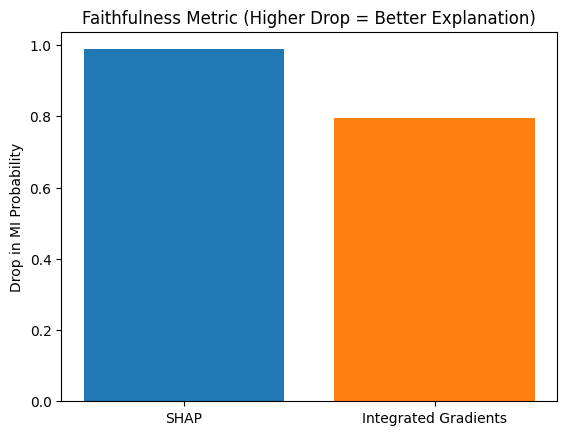

In [33]:
if score_shap > score_ig:
    print("\nWinner: SHAP is more faithful for this sample.")
else:
    print("\nWinner: Integrated Gradients is more faithful for this sample.")

# Visualization
methods = ['SHAP', 'Integrated Gradients']
scores = [score_shap, score_ig]

plt.bar(methods, scores, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Drop in MI Probability')
plt.title('Faithfulness Metric (Higher Drop = Better Explanation)')
plt.show()